# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

# Gerekli Verileri Import Etme


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Veriyi Okuma

In [2]:
df = pd.read_csv("./data/veriseti_20220203_olimpiyatlar.csv", encoding="utf-8")
df.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Veri Hakkında bilgi alma ve temizleme

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


# Veri Temizlemesi

In [4]:
df.columns

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [5]:
df.rename(columns={'ID':"id"}, inplace=True)

In [6]:
df.columns

Index(['id', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

# Yararsız verilerin çıkarılması
- id bilgisi yararlı bir bilgi verilmediği için çıkarılacaktır.


In [7]:
df.drop(columns=["id",'Games'],axis=1) #axis = 1 Sutün
df.head(2)

,id,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


# Kayıp Veri Sorunu
- Kayıp veri ile mücadele etmek için
  1. Kayıp veriye ait örnekler veriden çıkartılabilir.
  2. Kayıp veriler asıl verinin dağılımını bozmayacak şekilde asıl verinin ortalama yada medyan değerlerine göre doldurulabilir.
- Bu veri üzerinde çalışma yapılırken
    1. Boy-kilo sutünunda bulunan kayıp veriyi etkinlik ortalamasına göre dolduracağız.
    2. yaş sutününda bulunan kayıp veriyi yaş ortalamasına göre dolduracağız.
    3. Madalya alamayan sporcuları sütundan çıkartacağız.


# Boy-Kilo alanını doldurma

In [8]:

unique_events = pd.unique(df.Event)
print(f"Unique Events : {len(unique_events)}")
unique_events[:10]

Unique Events : 765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [28]:
#Her bir eventi interaktif olarak dolaş
#Etkinlik özelinde boy ve kilo ortalamalarını bul
#Etkinlik özelinde boy ve kilo değerlerini etkinlik ortalamalarına eşitle

temp_data = df.copy() # gerçek veriyi kaybetmemek için veri_gecici değişkeni belirle

for event in unique_events:
    avarege_height =  temp_data.where(temp_data["Event"] == event)["Height"].mean() #Data framedeki unique etkinlikleri dolaş ve bu etkinlikteki boy ortalamasını bul
    avarage_weight = temp_data.where(temp_data["Event"] == event)["Weight"].mean() # Dataframedeki unique etkinlikleri dolaş ve bu etkinlikteki kilo ortalamasını bul
    temp_data.fillna({"Height":avarege_height,"Weight":avarage_weight},inplace=True) #nan alanları ortalamalar ile doldur.
df = temp_data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  weight  266456 non-null  float64
dtypes: float64(4), int64(2), object(10)
memory usage: 33.1+ MB


# Yaş sutünündaki veriyi etkinlik bazında ortalamasına göre doldur.

In [37]:
temp_data = df.copy()

for event in unique_events:
    avarege_age =  np.round(temp_data.where(temp_data["Event"] == event)["Age"].mean(),2)
    temp_data.fillna({"Age":avarege_age},inplace=True)

df = temp_data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  weight  266456 non-null  float64
dtypes: float64(4), int64(2), object(10)
memory usage: 33.1+ MB


# Sadece boş verilerin ortalama ile doldurulup doldurulmadığını kontrol etme

In [35]:
temp = df.where(df["Event"] == "Basketball Men's Basketball")
print(temp)

         id       Name Gender   Age      Height  Weight   Team  NOC  \
0       1.0  A Dijiang      M  24.0  194.872624    80.0  China  CHN   
1       NaN        NaN    NaN   NaN         NaN     NaN    NaN  NaN   
2       NaN        NaN    NaN   NaN         NaN     NaN    NaN  NaN   
3       NaN        NaN    NaN   NaN         NaN     NaN    NaN  NaN   
4       NaN        NaN    NaN   NaN         NaN     NaN    NaN  NaN   
...     ...        ...    ...   ...         ...     ...    ...  ...   
271111  NaN        NaN    NaN   NaN         NaN     NaN    NaN  NaN   
271112  NaN        NaN    NaN   NaN         NaN     NaN    NaN  NaN   
271113  NaN        NaN    NaN   NaN         NaN     NaN    NaN  NaN   
271114  NaN        NaN    NaN   NaN         NaN     NaN    NaN  NaN   
271115  NaN        NaN    NaN   NaN         NaN     NaN    NaN  NaN   

              Games    Year  Season       City       Sport  \
0       1992 Summer  1992.0  Summer  Barcelona  Basketball   
1               NaN    

# Madalya alamayan Sporcuları Çıkarma

In [40]:
medal = df["Medal"]
pd.isnull(medal).sum()


231333

In [42]:
medal_filter = pd.notnull(medal) # Null olmayanları bul
df = df[medal_filter] #Null olmayan veriler ile tüm veriyi değiştir
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39783 entries, 3 to 271103
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      39783 non-null  int64  
 1   Name    39783 non-null  object 
 2   Gender  39783 non-null  object 
 3   Age     39783 non-null  float64
 4   Height  39783 non-null  float64
 5   Weight  39783 non-null  float64
 6   Team    39783 non-null  object 
 7   NOC     39783 non-null  object 
 8   Games   39783 non-null  object 
 9   Year    39783 non-null  int64  
 10  Season  39783 non-null  object 
 11  City    39783 non-null  object 
 12  Sport   39783 non-null  object 
 13  Event   39783 non-null  object 
 14  Medal   39783 non-null  object 
 15  weight  38292 non-null  float64
dtypes: float64(4), int64(2), object(10)
memory usage: 5.2+ MB


In [43]:
df.head()

,id,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,weight
3,4,Edgar Lindenau Aabye,M,34.0,182.480000,91.683529,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,95.615385
37,15,Arvo Ossian Aaltonen,M,30.0,182.008432,91.683529,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,76.694056
38,15,Arvo Ossian Aaltonen,M,30.0,177.000000,91.683529,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,75.000000
40,16,Juhamatti Tapio Aaltonen,M,28.0,180.991444,85.000000,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,83.775593
41,17,Paavo Johannes Aaltonen,M,28.0,167.634932,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,63.348624


# Veriyi Kaydetme

In [44]:
df.to_csv("./data/olimpiyatlar_clean.csv",index=False)

# Tek Değişkenli Veri analizi
 - Sayısal değişkenler
    1. Yaş
    2. Boy
    3. Kilo
    4. Yıl
  - Kategorik değişkenler
    1. İsim
    2. Cinsiyet
    3. Takım
    4. UOK
    5. Sezon
    6. Şehir
    7. Spor
    8. Etkinlik
    9. Medalya
  - Veri sıklığını anlamak için histogram çizilecek
  - Temel istatistik bilgileri kutu grafiği sayesinde yorumlanacak


In [47]:
# Öncelik olarak histogram grafikleri çizilecek bir fonksiyon yaz.
def plot_histogram(column):
    """
    Girdi: Değişken/Sutün ismi
    Çıktı: Histogram
    """
    plt.figure()
    plt.hist(df[column],bins=85,color="orange")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {column}")
    plt.show()


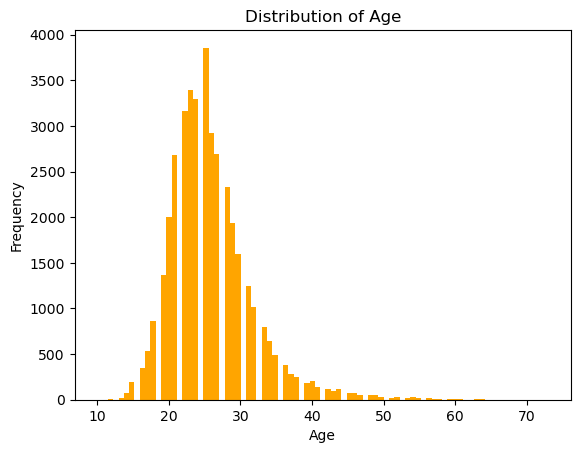

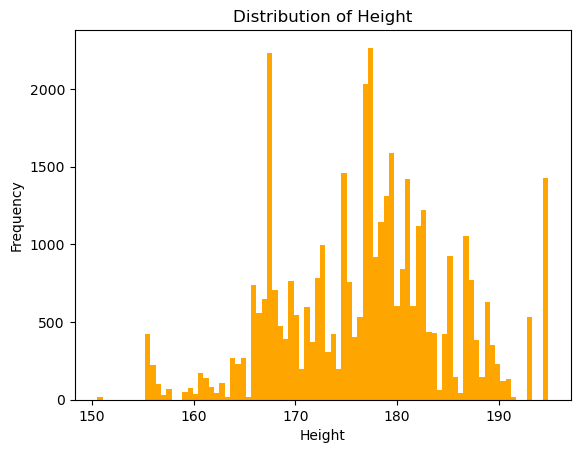

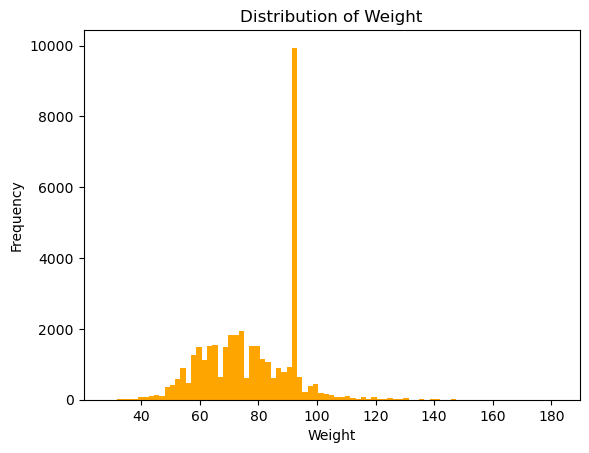

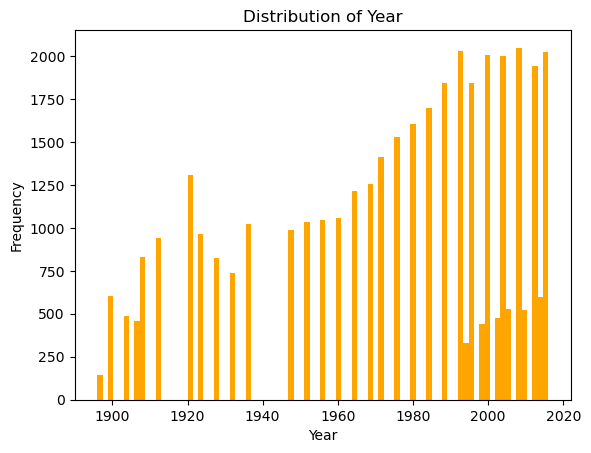

In [49]:
# Tüm sayısal değişkenler için histogramı çizdir.

numeric_variables = ["Age","Height","Weight","Year"]

for variable in numeric_variables:
    plot_histogram(variable)
